In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# descomprimir archivos csv desde zip
!cp -r /content/drive/My\ Drive/Machine\ learning/ml-fintech.zip ./ml-fintech.zip

!unzip -oq ml-fintech.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("solicitudes_train.csv")

In [ ]:
df.shape

(150679, 123)

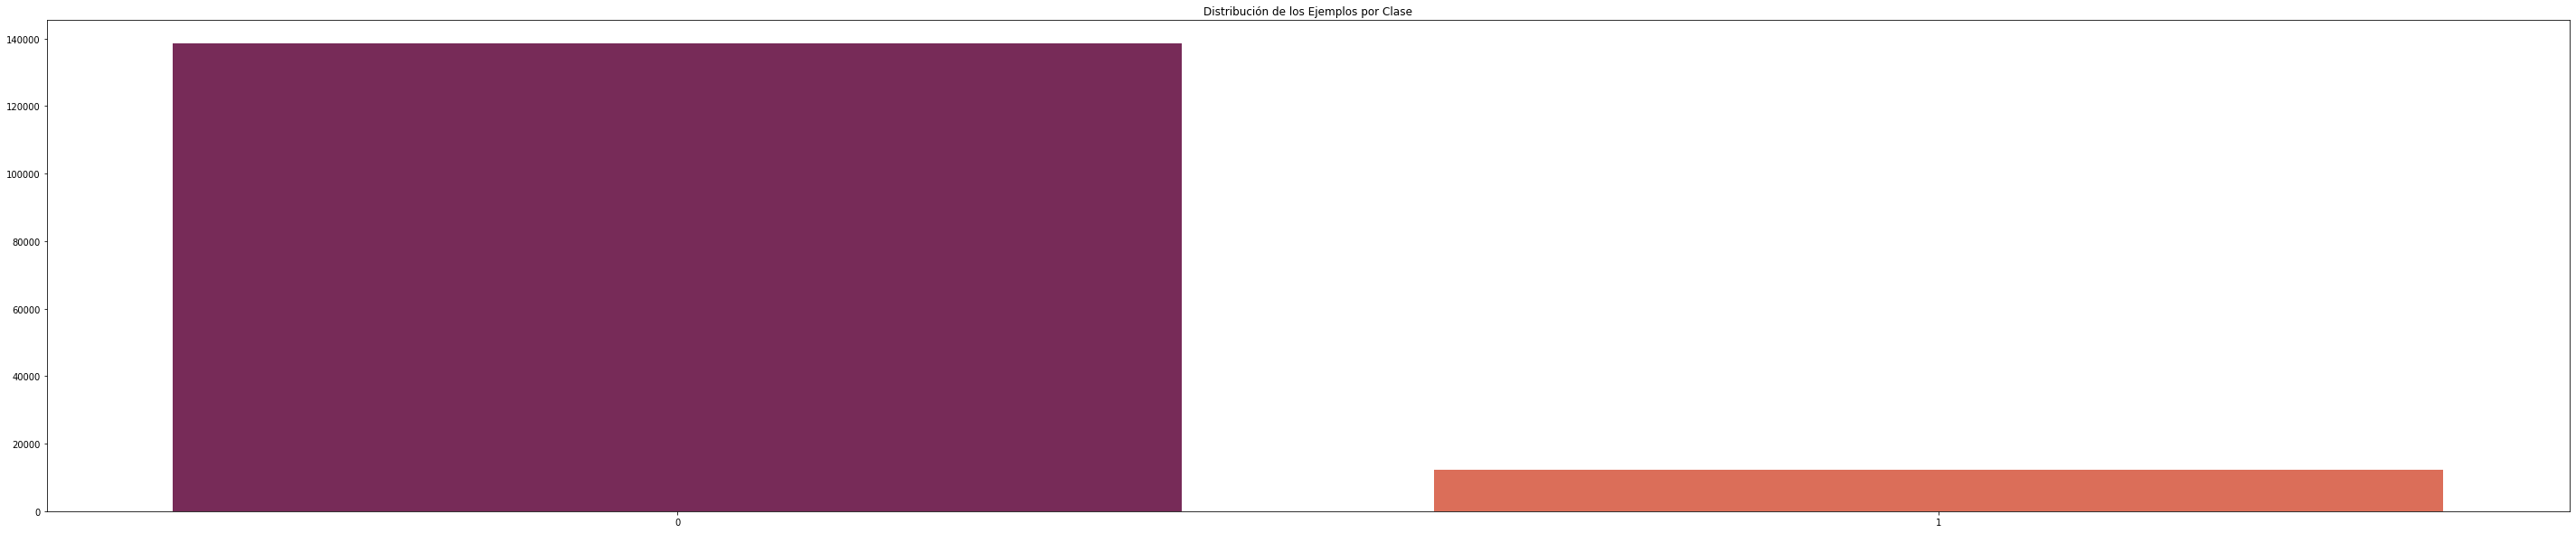

In [ ]:
clases, frecuencia = np.unique(df['TARGET'], return_counts=True)

fig, ax = plt.subplots(figsize=(50,10),nrows=1)
p = sns.barplot(x=clases, y=frecuencia, palette="rocket",ax=ax)
ax.set_title('Distribución de los Ejemplos por Clase')
plt.show()

Estamos en presencia de un dataset desbalanceado

In [ ]:
df_cuantitativo=df.select_dtypes(include='number')
df_cualitativo=df.select_dtypes(include='object')

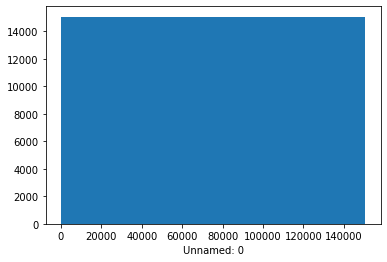

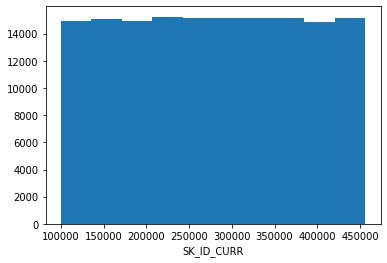

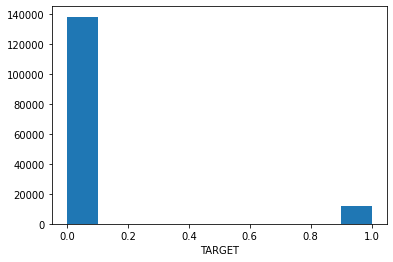

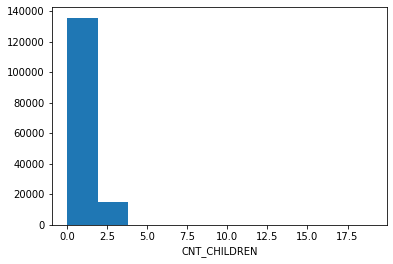

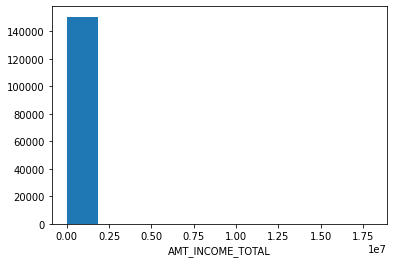

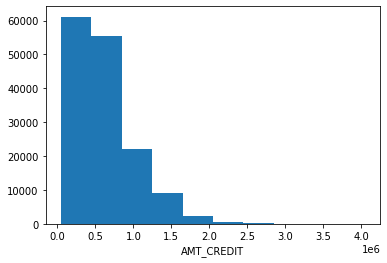

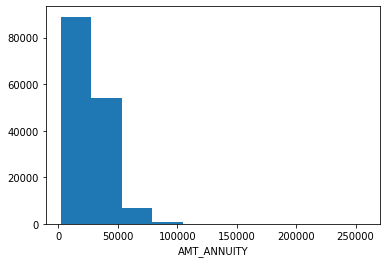

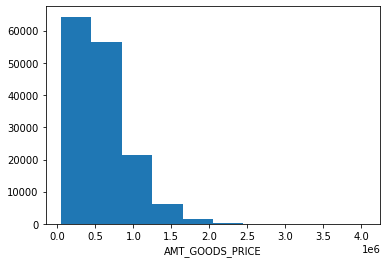

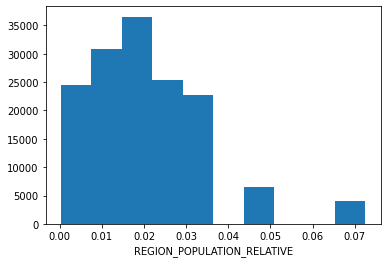

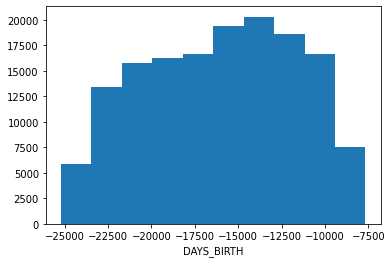

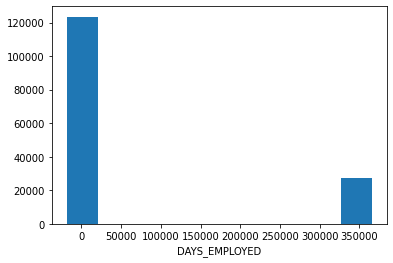

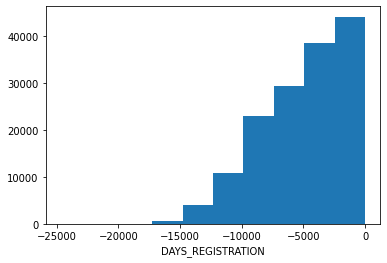

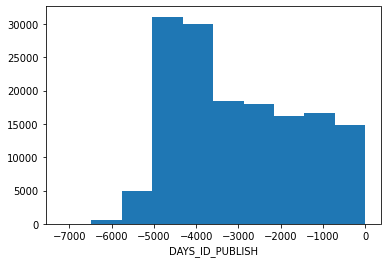

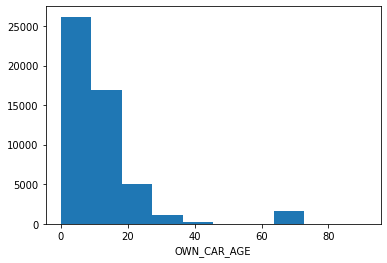

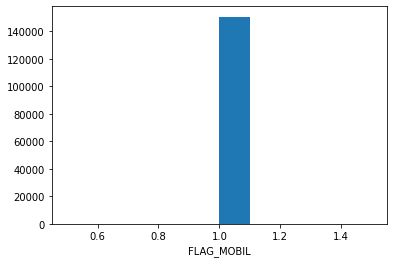

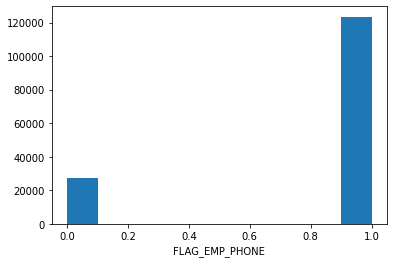

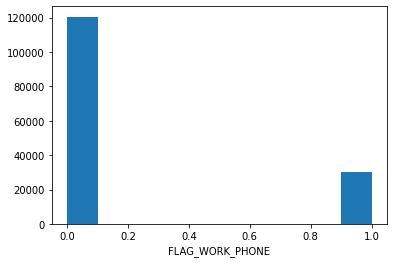

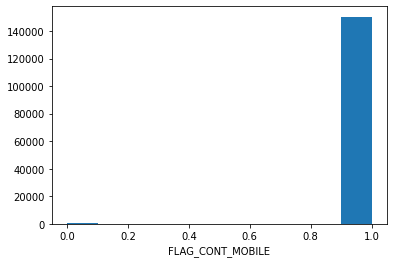

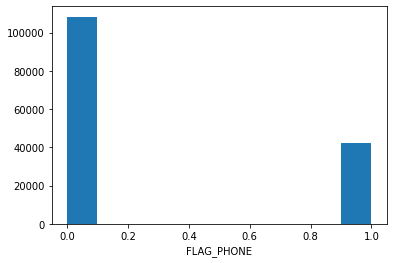

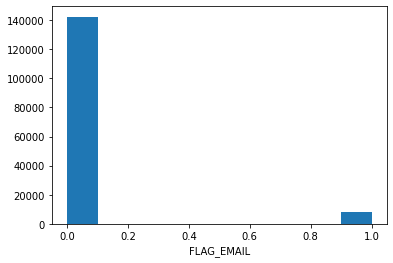

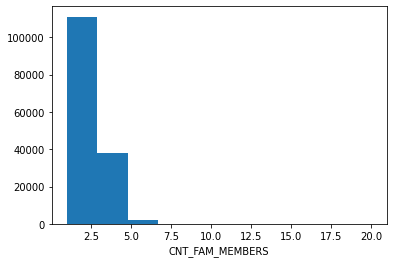

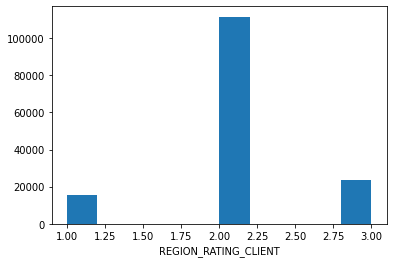

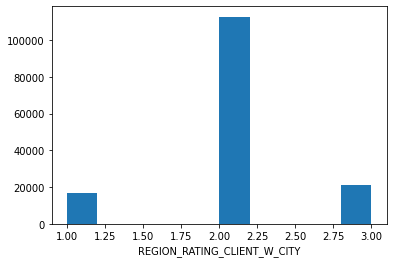

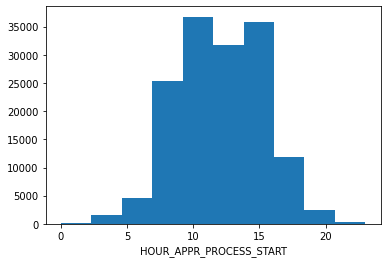

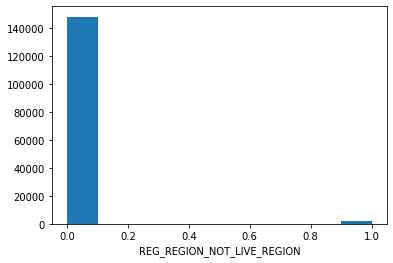

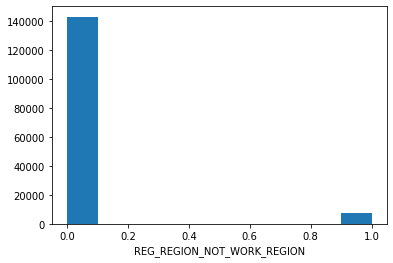

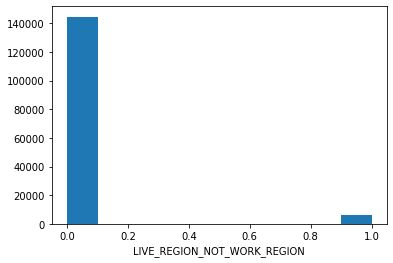

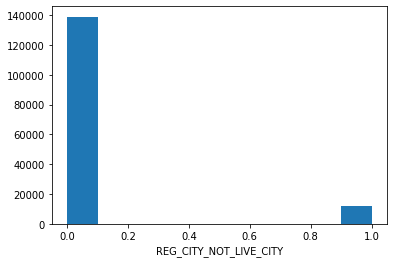

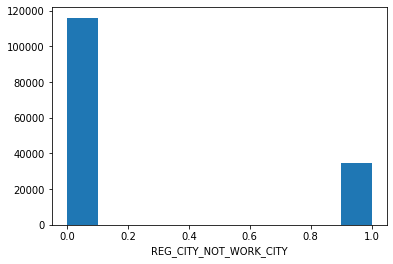

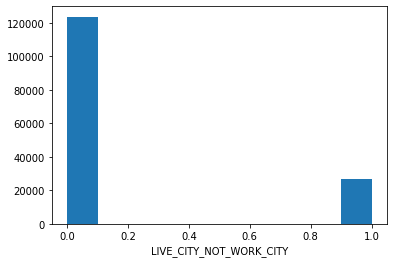

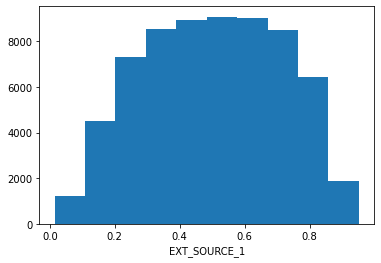

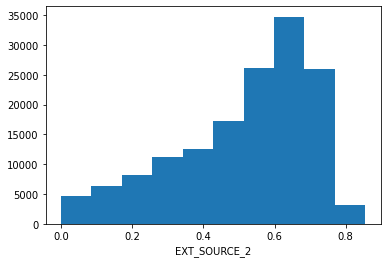

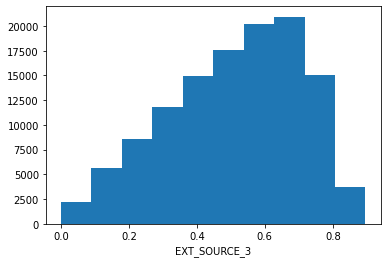

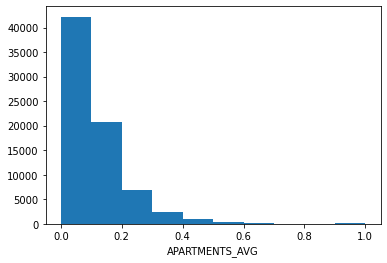

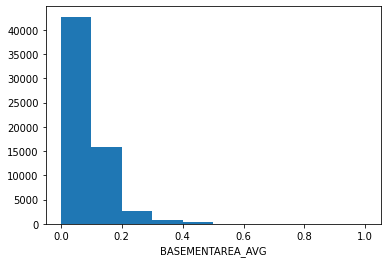

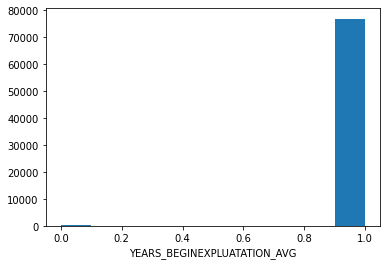

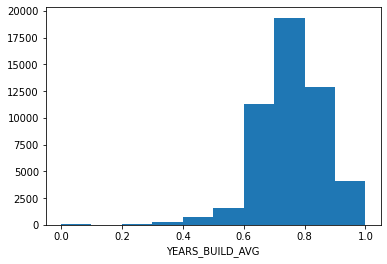

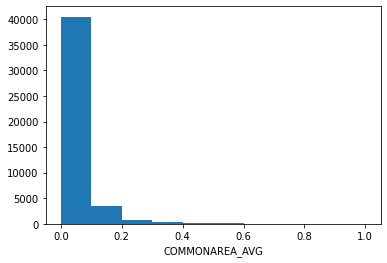

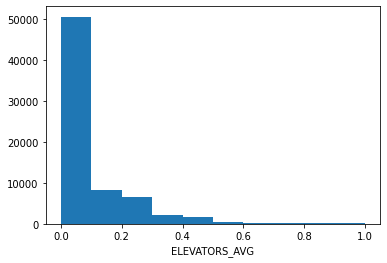

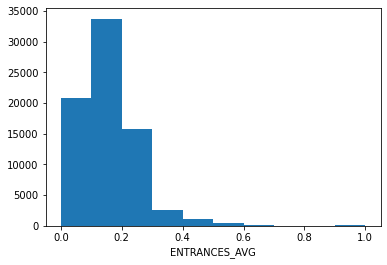

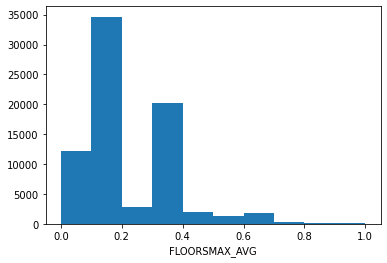

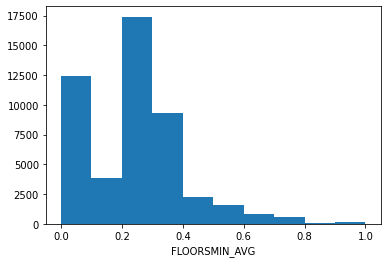

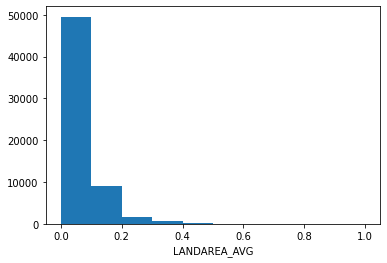

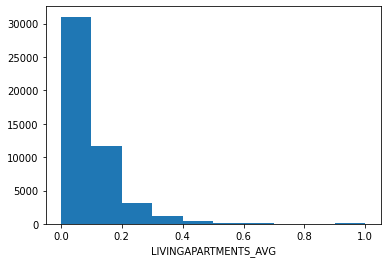

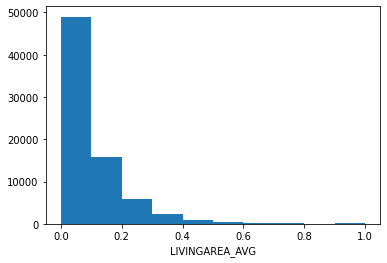

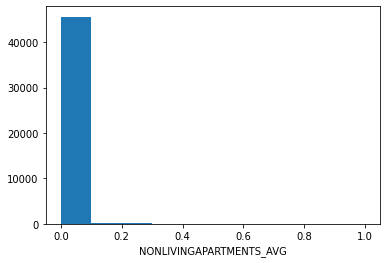

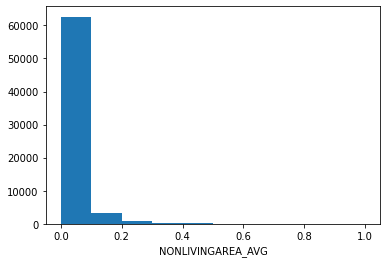

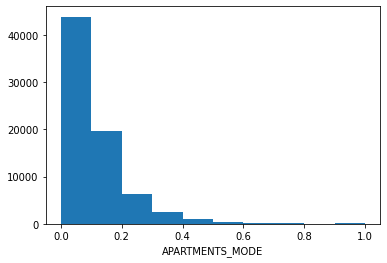

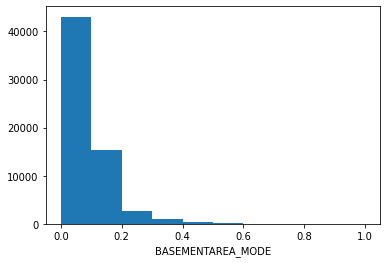

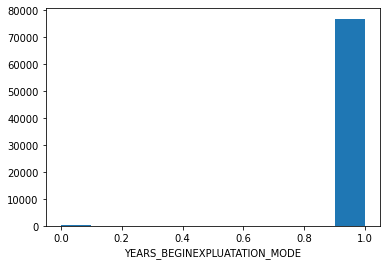

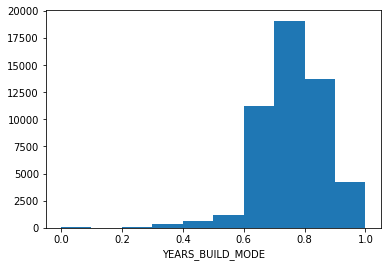

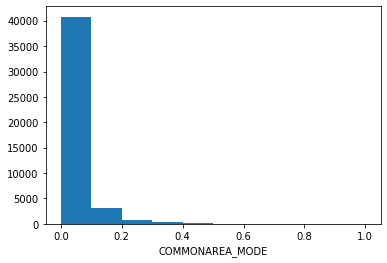

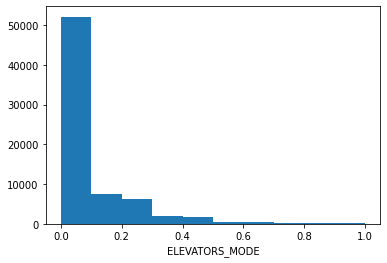

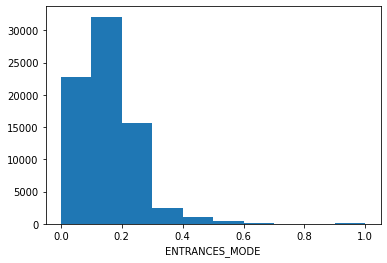

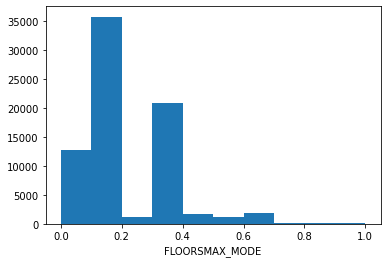

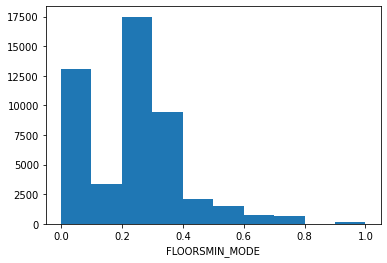

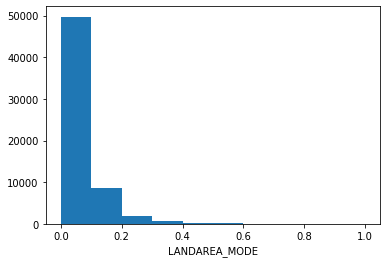

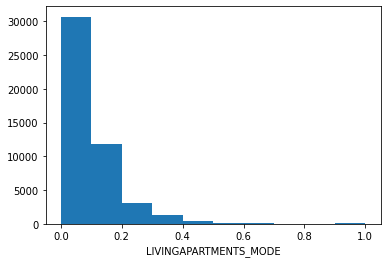

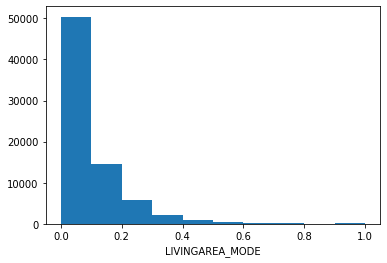

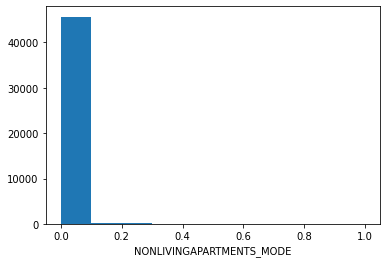

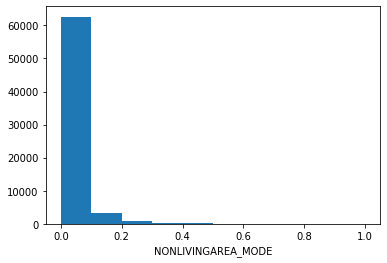

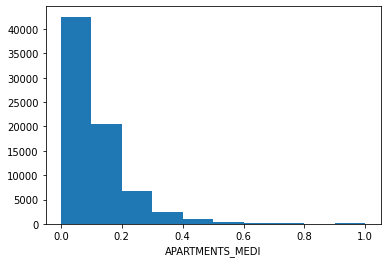

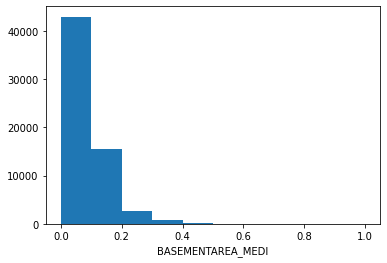

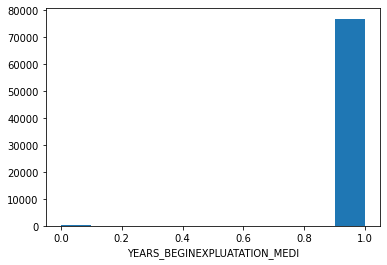

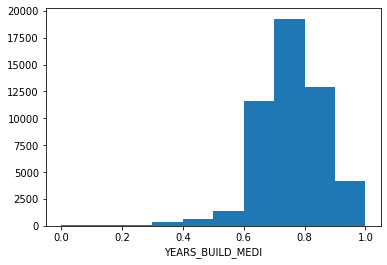

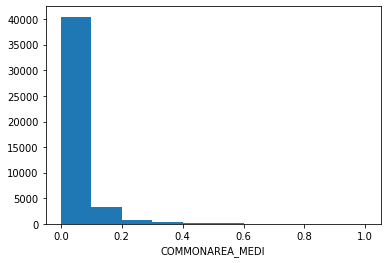

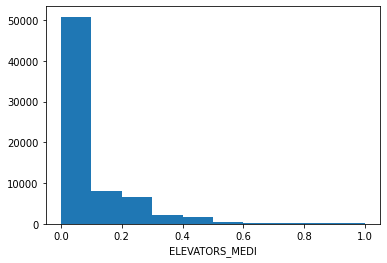

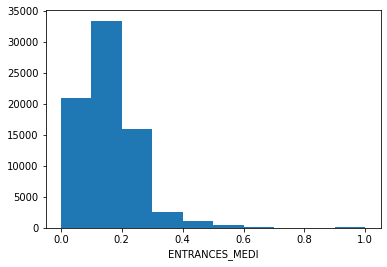

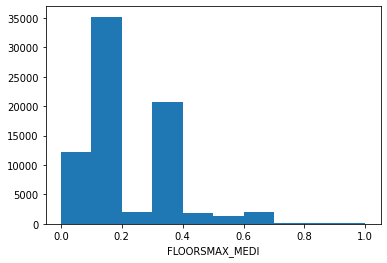

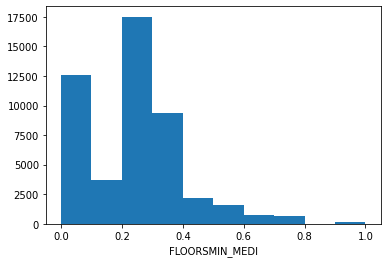

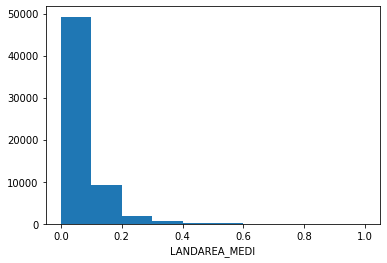

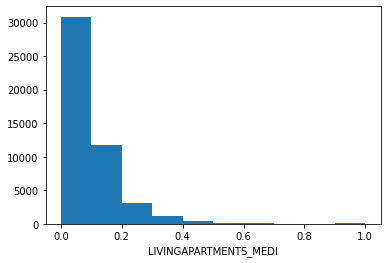

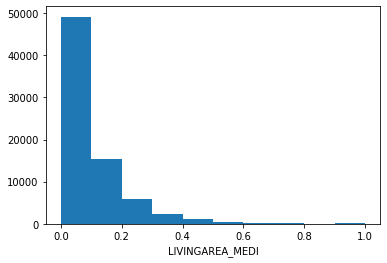

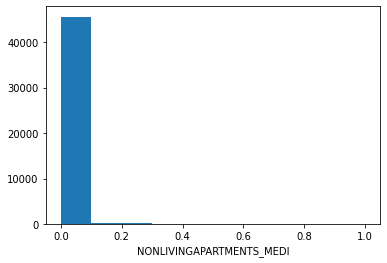

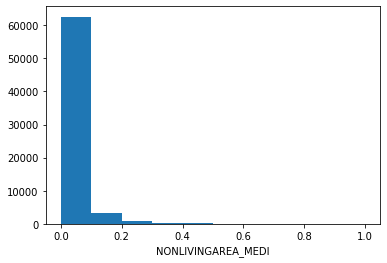

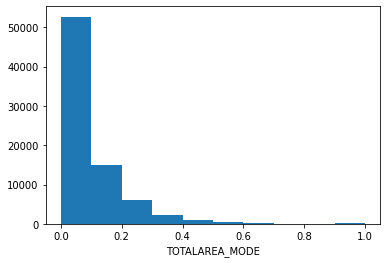

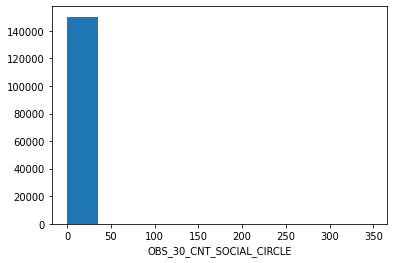

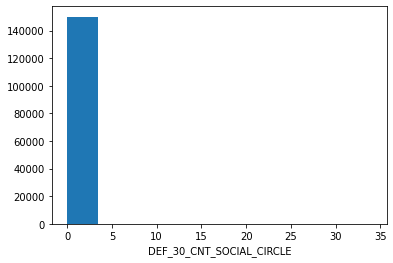

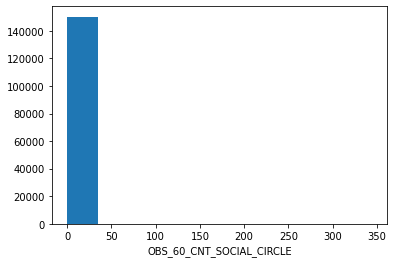

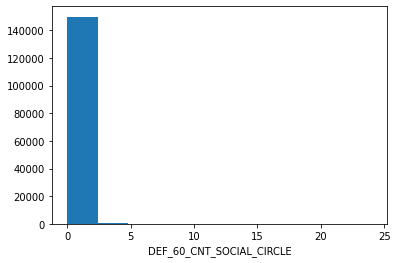

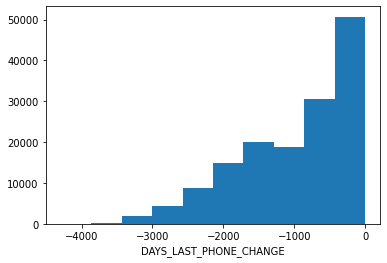

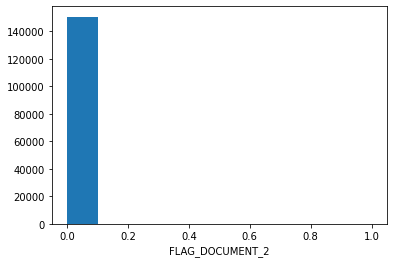

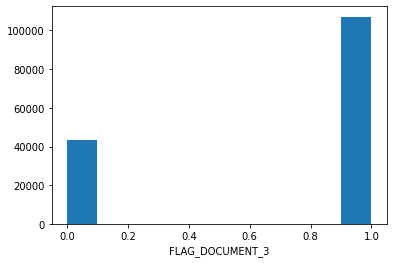

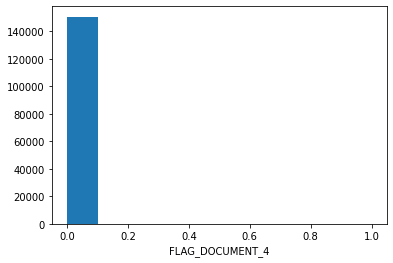

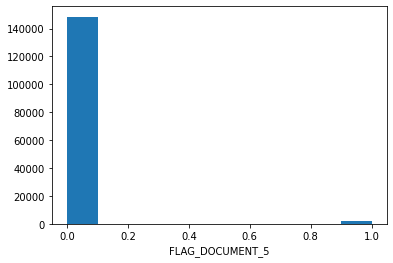

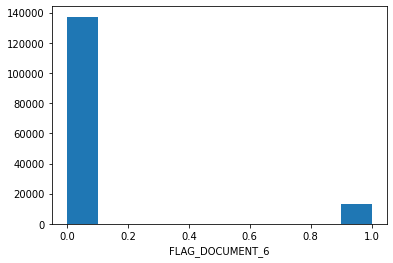

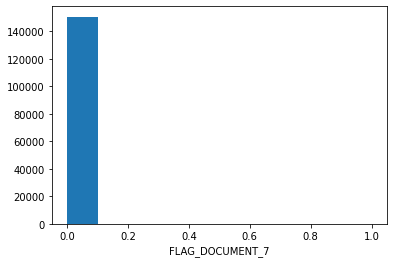

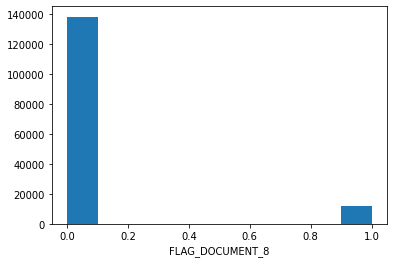

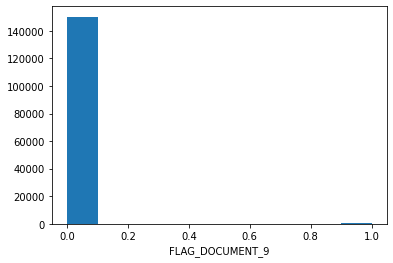

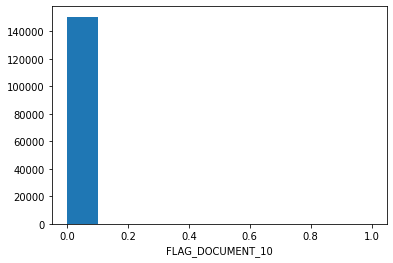

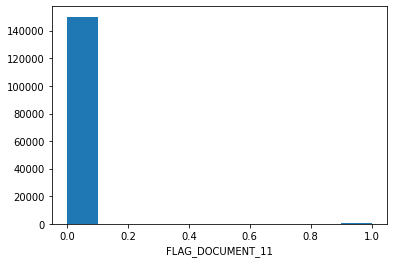

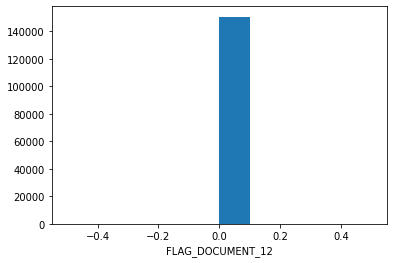

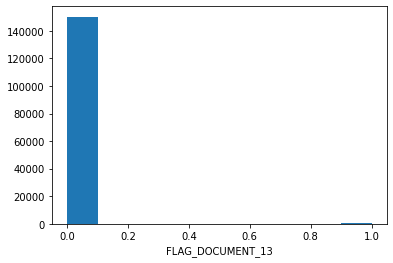

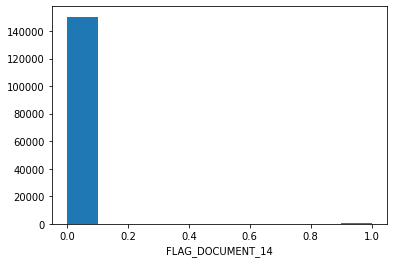

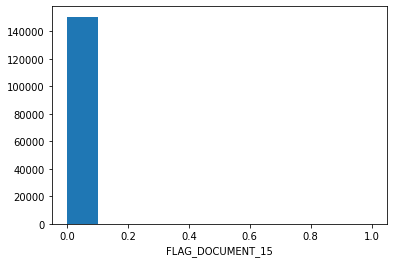

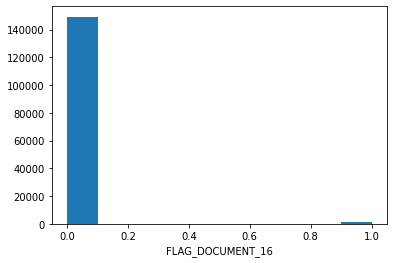

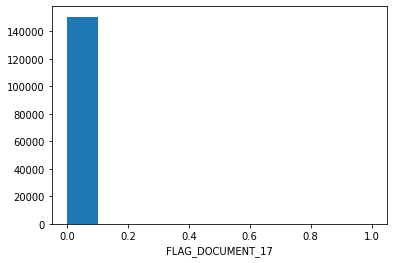

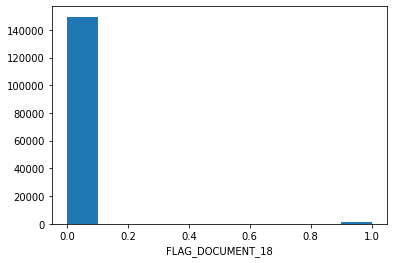

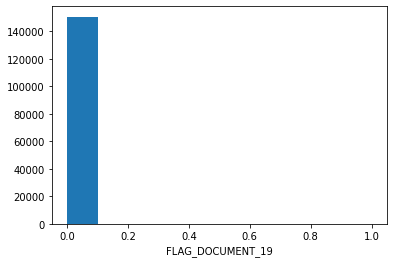

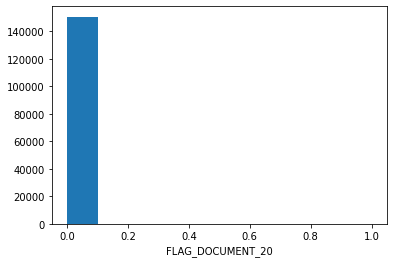

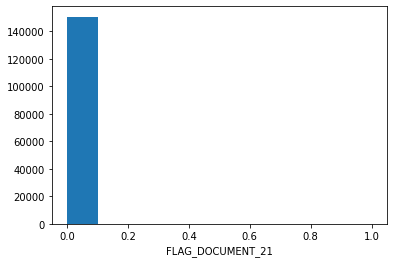

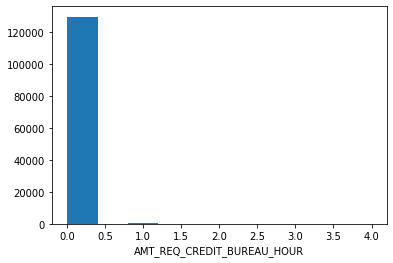

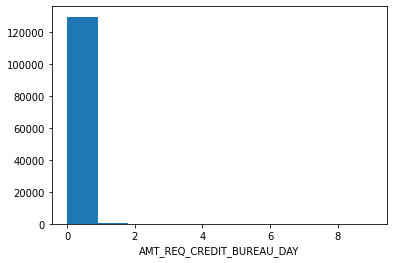

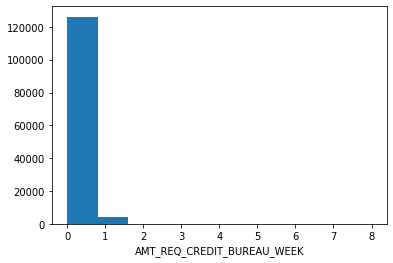

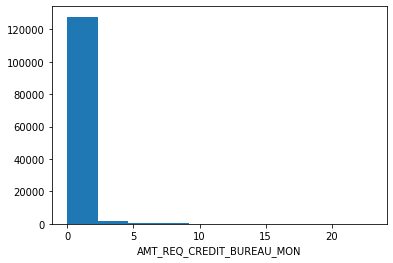

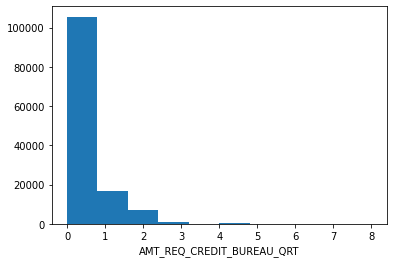

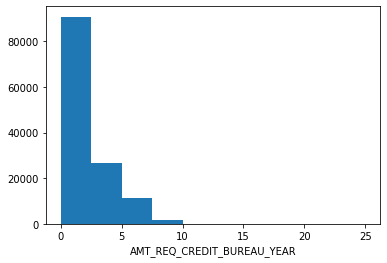

In [ ]:
for columna in df_cuantitativo.columns:
    plt.figure()
    plt.hist(df_cuantitativo[columna])
    plt.xlabel(columna)
    # Show/save figure as desired.
    plt.show()

Hacemos get dummies sobre los conjuntos de entrenamiento y testeo

-Ver que hacer con el dropna(), se eliminan muchos datos, propuesta: rellenar con el promedio?

Idea: rellenar con el promedio en datos numericos y en datos categoricos agregar una nueva catgoria como NAN

In [ ]:
for columna in df_cuantitativo.columns:
  df_cuantitativo[columna]=df_cuantitativo[columna].replace(np.nan,df_cuantitativo[columna].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for columna in df_cualitativo.columns:
  df_cualitativo[columna]=df_cualitativo[columna].replace(np.nan,"NaN")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_final=pd.merge(df_cuantitativo, df_cualitativo, left_index=True, right_index=True)

In [ ]:
df_final=df_final.drop(columns=['Unnamed: 0'])

In [ ]:
df_final.shape

(150679, 122)

In [ ]:
df_cuantitativo.shape

(150679, 107)

In [ ]:
df_cualitativo.shape

(150679, 16)

In [ ]:
data_cualitativo=pd.get_dummies(df_cualitativo)

In [ ]:
data_cualitativo

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_NaN,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_NaN,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,1,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150674,1,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
150675,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
150676,0,1,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
150677,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df_cuantitativo=df_cuantitativo.drop(columns=['Unnamed: 0'])

In [ ]:
df_final=pd.merge(df_cuantitativo, data_cualitativo, left_index=True, right_index=True)

In [ ]:
df_final=df_final.drop(columns=['Unnamed: 0'])

KeyError: ignored

In [ ]:
X=df_final.drop(columns=['TARGET']).values
y=df_final['TARGET'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_final=scaler.fit_transform(df_final.values)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
model=LogisticRegression(solver='liblinear',verbose=2)
model.fit(X_train,y_train)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(model.predict(X_test), y_test)

0.9184364215556146

In [ ]:
df_test=pd.read_csv("solicitudes_test.csv").drop(columns=['Unnamed: 0'])

In [ ]:
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,251482,Cash loans,M,Y,Y,1,247500.0,338832.0,17869.5,292500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
1,152322,Cash loans,F,Y,Y,0,157500.0,566055.0,16681.5,472500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
2,213864,Cash loans,F,Y,N,0,225000.0,1024740.0,52452.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
3,149195,Cash loans,M,Y,Y,1,90000.0,1078200.0,31653.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,215443,Cash loans,F,N,Y,0,81000.0,269550.0,12964.5,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64573,449354,Cash loans,F,N,Y,0,157500.0,808650.0,29709.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
64574,118433,Cash loans,M,N,Y,0,540000.0,306000.0,11664.0,306000.0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0
64575,177671,Cash loans,F,N,N,0,112500.0,454500.0,19107.0,454500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
64576,449847,Cash loans,F,N,Y,0,112500.0,805882.5,25434.0,612000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0


In [ ]:
df_cuantitativo_test=df_test.select_dtypes(include='number')
df_cualitativo_test=df_test.select_dtypes(include='object')

In [ ]:
for columna in df_cuantitativo_test.columns:
  df_cuantitativo_test[columna]=df_cuantitativo_test[columna].replace(np.nan,df_cuantitativo_test[columna].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for columna in df_cualitativo_test.columns:
  df_cualitativo_test[columna]=df_cualitativo_test[columna].replace(np.nan,"NaN")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data_cualitativo_test=pd.get_dummies(df_cualitativo_test)

In [ ]:
df_final_test=pd.merge(df_cuantitativo_test, data_cualitativo_test, left_index=True, right_index=True)

In [ ]:
df_final_test.columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic',
       'WALLSMATERIAL_MODE_NaN', 'WALLSMATERIAL_MODE_Others',
       'WALLSMATERIAL_MODE_Panel', 'WALLSMATERIAL_MODE_Stone, brick',
       'WALLSMATERIAL_MODE_Wooden', 'EMERGENCYSTATE_MODE_NaN',
       'EMERGENCYSTATE_MODE_No', 'EMERGENCYSTATE_MODE_Yes'],
      dtype='object', length=248)

In [ ]:
df_final_test

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_NaN,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_NaN,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,251482,1,247500.0,338832.0,17869.5,292500.0,0.019101,-12090,-1998,-559.0,...,0,0,1,0,0,0,0,1,0,0
1,152322,0,157500.0,566055.0,16681.5,472500.0,0.019689,-20192,365243,-255.0,...,0,0,1,0,0,0,0,1,0,0
2,213864,0,225000.0,1024740.0,52452.0,900000.0,0.006207,-20635,365243,-10584.0,...,0,0,0,0,1,0,0,0,1,0
3,149195,1,90000.0,1078200.0,31653.0,900000.0,0.020246,-15237,-4723,-2397.0,...,0,0,1,0,0,0,0,1,0,0
4,215443,0,81000.0,269550.0,12964.5,225000.0,0.010500,-18744,-7109,-4163.0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64573,449354,0,157500.0,808650.0,29709.0,675000.0,0.031329,-23298,-6521,-3273.0,...,0,0,0,0,1,0,0,0,1,0
64574,118433,0,540000.0,306000.0,11664.0,306000.0,0.032561,-16151,-5212,-8485.0,...,0,0,0,0,1,0,0,0,1,0
64575,177671,0,112500.0,454500.0,19107.0,454500.0,0.003818,-9320,-754,-7652.0,...,0,0,1,0,0,0,0,1,0,0
64576,449847,0,112500.0,805882.5,25434.0,612000.0,0.007305,-19606,-1665,-11557.0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
df_final_test['CODE_GENDER_XNA']=[0]*len(df_final_test)
df_final_test['NAME_FAMILY_STATUS_Unknown']=[0]*len(df_final_test)
df_final_test['NAME_INCOME_TYPE_Maternity leave']=[0]*len(df_final_test)

In [ ]:
df_final_array=scaler.transform(df_final_test.values)

In [ ]:
model.predict(df_final_array).shape

(64578,)

In [ ]:
df_final_array.shape

(64578, 251)

In [ ]:
df_submition=pd.read_csv("submission_example.csv")
df_submition.head()

,SK_ID_CURR,TARGET
0,251482,0
1,152322,0
2,213864,0
3,149195,0
4,215443,0


In [ ]:
df_final_submition=pd.DataFrame()
df_final_submition['SK_ID_CURR']=df_final_test['SK_ID_CURR']
df_final_submition['TARGET']=model.predict(df_final_array)
df_final_submition

,SK_ID_CURR,TARGET
0,251482,1
1,152322,1
2,213864,0
3,149195,0
4,215443,0
...,...,...
64573,449354,0
64574,118433,0
64575,177671,1
64576,449847,1


In [ ]:
df_final_submition.to_csv("df_final_ML_4.csv",index=False)

In [ ]:
df_final_submition

,SK_ID_CURR,TARGET
0,251482,1
1,152322,1
2,213864,0
3,149195,0
4,215443,0
...,...,...
64573,449354,0
64574,118433,0
64575,177671,1
64576,449847,1
